### 3.0 Libraries

In [5]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from time import sleep
from random import uniform
from random import randint

### 3.1. Read the csv-file

In [6]:
file = pd.read_csv('NYT_bestseller_Step_3.csv')

In [7]:
file.head()

,Unnamed: 0,Author,Book,Genre,Year,Searching_Value,Searching_Value2
0,0,Warwick Deeping,The Ten Commandments,fiction,1931,The Ten Commandments Warwick Deeping,The+Ten+Commandments+Warwick+Deeping
1,1,John Galsworthy,Maid in Waiting,fiction,1931,Maid in Waiting John Galsworthy,Maid+in+Waiting+John+Galsworthy
2,2,William McFee,The Harbourmaster,fiction,1932,The Harbourmaster William McFee,The+Harbourmaster+William+McFee
3,3,Francis Brett Young,Mr. and Mrs. Pennington,fiction,1932,Mr. and Mrs. Pennington Francis Brett Young,Mr.+and+Mrs.+Pennington+Francis+Brett+Young
4,4,Robert Herrick,The End of Desire,fiction,1932,The End of Desire Robert Herrick,The+End+of+Desire+Robert+Herrick


### 3.2. Create the list for web scraping

In [8]:
list = file["Searching_Value"]
search_value = list.tolist()
search_value

['The Ten Commandments Warwick Deeping',
 'Maid in Waiting John Galsworthy',
 'The Harbourmaster William McFee',
 'Mr. and Mrs. Pennington Francis Brett Young',
 'The End of Desire Robert Herrick',
 "Mary's Neck Booth Tarkington",
 'Magnolia Street Louis Golding',
 'Bright Skin Julia Peterkin',
 'A Modern Hero Louis Bromfield',
 'The Good Earth Pearl S. Buck',
 'District Nurse Faith Baldwin',
 'The Fountain Charles Langbridge Morgan',
 'Faraway J. B. Priestley',
 'Lark Ascending Mazo De La Roche',
 'A New York Tempest Manuel Komroff',
 'The Sheltered Life Ellen Glasgow',
 'Sons Pearl S. Buck',
 'Invitation to the Waltz Rosamond Lehmann',
 'Flowering Wilderness John Galsworthy',
 'The Last Adam James Gould Cozzens',
 'Ann Vickers Sinclair Lewis',
 'The Werewolf of Paris Guy Endore',
 'Rain in the Doorway Thorne Smith',
 'As the Earth Turns Gladys Hasty Carroll',
 'The Store T. S. Stribling',
 'Little Man, What Now? Hans Fallada',
 'Anthony Adverse Hervey Allen',
 nan,
 'The Thin Man Das

### 3.3. Prepare the web scraping

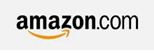

In [9]:
url = "https://www.amazon.com/s?k=The+Ten+Commandments+Warwick+Deeping&ref=nb_sb_noss"

In [10]:
headers = ({'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})

In [11]:
response = requests.get(url, headers=headers)
response.status_code

200

In [12]:
soup = BeautifulSoup(response.content, "html.parser")
soup

<!DOCTYPE html>

<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title dir="ltr">Amazon.com</title>
<meta content="width=device-width" name="viewport"/>
<link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
<script>

if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-na.amazon.com",
        ue_mid = "ATVPDKIKX0DER"

- test for one webpages

In [21]:
soup.select("div.s-result-item:nth-child(1) > div:nth-child(1) > span:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > h2:nth-child(1) > a:nth-child(1)")
#div.s-result-item:nth-child(1) > div:nth-child(1) > span:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > h2:nth-child(1) > a:nth-child(1)

[<a class="a-link-normal a-text-normal" href="/Ten-Commandments-Warwick-Deeping/dp/B003HFNP8Y/ref=sr_1_1?dchild=1&amp;keywords=The+Ten+Commandments+Warwick+Deeping&amp;qid=1621230356&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">The Ten Commandments</span> </a>]

In [2]:
soup.find_all("a")

NameError: name 'soup' is not defined

### 3.4. Web Scraping for the link to the search result
- At this step, I need the url from the seach result to the specific product infos on Amazon. 
1. Scrap the link to the product infos (only a url)
2. Scrap the infos about the product (like: pages, reviews, ratings......)

In [36]:
# 1 
pages = []
url_lst = []

for i in search_value:
    url = f"https://www.amazon.com/s?k={i}&ref=nb_sb_noss"
    url_lst.append(url)
    
    # download the url
    response = requests.get(url, headers=headers)
    
    # print the status code
    print("Status code: " + str(response.status_code))
    
    pages.append(response)
    
    # respectful nap
    wait_time = randint(3,8)
    sleep(wait_time)
    

Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 2

Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 2

Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 200
Status code: 2

- search for the correct css-selsctor (aim: select the url to the product information on Amazon)

In [129]:
soup = BeautifulSoup(pages[2].content, "html.parser")

In [183]:
soup.select("div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > h2:nth-child(1) > a:nth-child(1)")
# div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > h2:nth-child(1) > a:nth-child(1)

[<a class="a-link-normal a-text-normal" href="/Harbourmaster-William-McFee/dp/B000OKVV2M/ref=sr_1_1?dchild=1&amp;keywords=The+Harbourmaster+William+McFee&amp;qid=1621230911&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">The Harbourmaster</span> </a>,
 <a class="a-link-normal a-text-normal" href="/William-Beachcomber-Harbourmaster-Harbours-Memory/dp/B091HM4SXG/ref=sr_1_2?dchild=1&amp;keywords=The+Harbourmaster+William+McFee&amp;qid=1621230911&amp;sr=8-2"><span class="a-size-medium a-color-base a-text-normal">Rare 3 William McFee ~ The Beachcomber ~ The Harbourmaster ~ Harbours of Memory</span> </a>,
 <a class="a-link-normal a-text-normal" href="/Literary-Guild-Decorative-Titles-Harbourmaster/dp/B000SHQZPO/ref=sr_1_3?dchild=1&amp;keywords=The+Harbourmaster+William+McFee&amp;qid=1621230911&amp;sr=8-3"><span class="a-size-medium a-color-base a-text-normal">Literary Guild Decorative Set Six Titles : The Beachcomber, Casuals of the Sea, Command, The Harbourmaster, Harbour

In [49]:
len(pages)

1402

In [131]:
pages_parsed = []

# looping through all pages
for i in range(len(pages)):
    # a soup for ever search result page
    pages_parsed.append(BeautifulSoup(pages[i].content, "html.parser"))

In [132]:
len (pages_parsed)

1402

In [184]:
url_list = []

# looping through all pages
for i in range(len(pages)):
    # a soup for ever search result page
    pages_parsed =(BeautifulSoup(pages[i].content, "html.parser"))
    url_list.append(pages_parsed.select("div.s-result-item:nth-child(1) > div:nth-child(1) > span:nth-child(1) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(2) > div:nth-child(1) > div:nth-child(1) > h2:nth-child(1) > a:nth-child(1)"))

In [185]:
len(url_list)

1402

In [186]:
url_list

[[<a class="a-link-normal a-text-normal" href="/Ten-Commandments-Warwick-Deeping/dp/B003HFNP8Y/ref=sr_1_1?dchild=1&amp;keywords=The+Ten+Commandments+Warwick+Deeping&amp;qid=1621230902&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">The Ten Commandments</span> </a>],
 [<a class="a-link-normal a-text-normal" href="/Forsyte-Saga-Maid-Waiting-ebook/dp/B00GW4JVWQ/ref=sr_1_1?dchild=1&amp;keywords=Maid+in+Waiting+John+Galsworthy&amp;qid=1621230907&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">The Forsyte Saga 7: Maid in Waiting</span> </a>],
 [<a class="a-link-normal a-text-normal" href="/Harbourmaster-William-McFee/dp/B000OKVV2M/ref=sr_1_1?dchild=1&amp;keywords=The+Harbourmaster+William+McFee&amp;qid=1621230911&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">The Harbourmaster</span> </a>],
 [<a class="a-link-normal a-text-normal" href="/Mrs-Pennington-Francis-Brett-Young/dp/B0018IFEDG/ref=sr_1_1?dchild=1&amp;keywords=Mr.+and+Mrs.+Pen

- The resault shows that I do not get a url for each book. The work becomes more detailed, but my time is running. The web scraping on Amazon is difficult for me and I try the API WebHarvy (freeversion). But for the free version there are limitations so that is not the solution. I decide to avoid more time spending in web scraping on Amazaon that I 
to fill the list by hand. Now I go bacl to Step 2 and create a xlsfile.